In [1]:
# Ejup Hoxha
# EMPLID# 23820200
# Machine Learning - Homework 3

import numpy as np
import pandas as pd
import time
from numpy import linalg as la
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import copy
import random

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn import decomposition
import sys

np.set_printoptions(precision=3)

In [2]:
class LogRgrsReg(object):

    def __init__(self):
        None

    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

    def hypothesis(self, X, W):
        z = np.dot(X, W)
        return self.sigmoid(z)
    
    def cost_function(self, X, W, Y, lmbda):    
        predictions = self.sigmoid(X @ W)
        predictions[predictions == 1] = 0.9999999   # log(1) = 0
        gradient = (X.T @ (predictions - Y)) / len(Y) + lmbda*np.sum(W[1:-1]) / len(Y)
        return gradient

    def fit_model(self, X, W, Y, learn_rate=0.05, lmbda=0.001, epochs=10):
        W_model = []                                # save the weights for each class in this array
        classes = np.unique(Y)
        for c_class in classes:                     # iterate through all unique classes in Y
            Y_c = np.where(Y == c_class, 1, 0)      #
            W_i= copy.deepcopy(W)                   # Always use this as init weight
            for epoch in range(epochs):
                gradient = self.cost_function(X, W_i, Y_c, lmbda)
                W_i = W_i - learn_rate*gradient
            W_model.append(W_i)
        return W_model

    def predict_one_vs_all(self, X, W):
        max_probability = 0.0
        c_class = 99999
        for i in range(len(W)):
            curr_prob = self.hypothesis(X, W[i])
            if max_probability < curr_prob:
                max_probability = curr_prob
                c_class = i
        return c_class

    def check_accuracy(self, X, W, Y):
        accuracy = 0.0
        tot_hits = 0
        for i in range(len(X)):
            if self.predict_one_vs_all(X[i], W) == Y[i]:
                tot_hits += 1
        accuracy = tot_hits/len(Y)
        # print("Accuracy: {0}%".format(accuracy*100.0))
        return accuracy

    # Returns the weights calculated using Pseudo-Inverse
    def linear_regression(self, X, Y):
        return (np.linalg.inv(X.T @ X) @ X.T) @ Y




In [3]:
# Load digits data
digits = load_digits()
X_digits = np.asarray(digits.data)   
Y = np.asarray(digits.target)
Y = np.reshape(Y,[len(Y), 1])

# Reduce features using PCA
# X_digits = scale(X_digits)
pca = decomposition.PCA(n_components=10)
pca.fit(X_digits)
X_pca = pca.transform(X_digits)
print("Preserved amount of the information [{0}%]".format(np.sum(pca.explained_variance_ratio_)))

# Transform
phi_20 = PolynomialFeatures(5)
X = phi_20.fit_transform(X_pca)

# Add label with the corresponding row for shuffling
X = np.hstack((X, Y))
np.random.shuffle(X)    # Shuffle data

# Generate 5-Fold training and testing...
X_p1 = copy.deepcopy(X[0:359,:-1])
X_p2 = copy.deepcopy(X[359:718,:-1])
X_p3 = copy.deepcopy(X[718:1077,:-1])
X_p4 = copy.deepcopy(X[1077:1436,:-1])
X_p5 = copy.deepcopy(X[1436:1795,:-1])

Y_p1 = copy.deepcopy(X[0:359,-1])
Y_p2 = copy.deepcopy(X[359:718,-1])
Y_p3 = copy.deepcopy(X[718:1077,-1])
Y_p4 = copy.deepcopy(X[1077:1436,-1])
Y_p5 = copy.deepcopy(X[1436:1795,-1])

# leave 1st out
X_train1 = np.concatenate((X_p2, X_p3, X_p4, X_p5), axis=0)   
Y_train1 = np.concatenate((Y_p2, Y_p3, Y_p4, Y_p5), axis=None)
X_test1 = copy.deepcopy(X_p1)
Y_test1 = copy.deepcopy(Y_p1)

# leave 2nd out
X_train2 = np.concatenate((X_p1, X_p3, X_p4, X_p5), axis=0)   
Y_train2 = np.concatenate((Y_p1, Y_p3, Y_p4, Y_p5), axis=None)
X_test2 = copy.deepcopy(X_p2)
Y_test2 = copy.deepcopy(Y_p2)

# leave 3rd out
X_train3 = np.concatenate((X_p1, X_p2, X_p4, X_p5), axis=0)   
Y_train3 = np.concatenate((Y_p1, Y_p2, Y_p4, Y_p5), axis=None)
X_test3 = copy.deepcopy(X_p3)
Y_test3 = copy.deepcopy(Y_p3)

# leave 4th out
X_train4 = np.concatenate((X_p1, X_p2, X_p3, X_p5), axis=0)   
Y_train4 = np.concatenate((Y_p1, Y_p2, Y_p3, Y_p5), axis=None)
X_test4 = copy.deepcopy(X_p4)
Y_test4 = copy.deepcopy(Y_p4)

# leave 5th out
X_train5 = np.concatenate((X_p1, X_p2, X_p3, X_p4), axis=0)   
Y_train5 = np.concatenate((Y_p1, Y_p2, Y_p3, Y_p4), axis=None)
X_test5 = copy.deepcopy(X_p5)
Y_test5 = copy.deepcopy(Y_p5)

Preserved amount of the information [0.738226596136696%]


In [4]:
experiments = 8
E_in = np.zeros([experiments, 6]) 
E_out = np.zeros([experiments, 6]) 
E_cv = np.zeros([experiments, 6])
lambda_x = 1.91
logRegression = LogRgrsReg()
for i in range(experiments):
    w_init = X_train1[0]
    W_models_1 = logRegression.fit_model(X_train1, w_init, Y_train1, learn_rate=0.5, lmbda=lambda_x, epochs=500)
    w_init = X_train2[0]
    W_models_2 = logRegression.fit_model(X_train2, w_init, Y_train2, learn_rate=0.5, lmbda=lambda_x, epochs=500)
    w_init = X_train3[0]
    W_models_3 = logRegression.fit_model(X_train3, w_init, Y_train3, learn_rate=0.5, lmbda=lambda_x, epochs=500)
    w_init = X_train4[0]
    W_models_4 = logRegression.fit_model(X_train4, w_init, Y_train4, learn_rate=0.5, lmbda=lambda_x, epochs=500)
    w_init = X_train5[0]
    W_models_5 = logRegression.fit_model(X_train5, w_init, Y_train5, learn_rate=0.5, lmbda=lambda_x, epochs=500)

    E_cv_min = 1.0
    max_index = 1
    
    ### 5 fold validation:
    ##################################################################        
    tr_1 = 1.0-logRegression.check_accuracy(X_train1, W_models_1, Y_train1)
    ts_1 = 1.0-logRegression.check_accuracy(X_test1, W_models_1, Y_test1)
    # E_cv 1:
    eval1_1 = 1.0-logRegression.check_accuracy(X_p1, W_models_1, Y_p1)
    eval1_2 = 1.0-logRegression.check_accuracy(X_p2, W_models_1, Y_p2)
    eval1_3 = 1.0-logRegression.check_accuracy(X_p3, W_models_1, Y_p3)
    eval1_4 = 1.0-logRegression.check_accuracy(X_p4, W_models_1, Y_p4)
    eval1_5 = 1.0-logRegression.check_accuracy(X_p5, W_models_1, Y_p5)
    E_cv1 = float(1.0/5.0)*(eval1_1+eval1_2+eval1_3+eval1_4+eval1_5)
    E_cv_min = E_cv1
    ###################################################################    
    tr_2 = 1.0-logRegression.check_accuracy(X_train2, W_models_2, Y_train2)
    ts_2 = 1.0-logRegression.check_accuracy(X_test2, W_models_2, Y_test2)
    # E_cv 2:
    eval2_1 = 1.0-logRegression.check_accuracy(X_p1, W_models_2, Y_p1)
    eval2_2 = 1.0-logRegression.check_accuracy(X_p2, W_models_2, Y_p2)
    eval2_3 = 1.0-logRegression.check_accuracy(X_p3, W_models_2, Y_p3)
    eval2_4 = 1.0-logRegression.check_accuracy(X_p4, W_models_2, Y_p4)
    eval2_5 = 1.0-logRegression.check_accuracy(X_p5, W_models_2, Y_p5)
    E_cv2 = float(1.0/5.0)*(eval2_1+eval2_2+eval2_3+eval2_4+eval2_5)
    if E_cv_min > E_cv2:
        E_cv_min = E_cv2
        max_index = 2
    ###################################################################  
    tr_3 = 1.0-logRegression.check_accuracy(X_train3, W_models_3, Y_train3)
    ts_3 = 1.0-logRegression.check_accuracy(X_test3, W_models_3, Y_test3)
    # E_cv 3:
    eval3_1 = 1.0-logRegression.check_accuracy(X_p1, W_models_3, Y_p1)
    eval3_2 = 1.0-logRegression.check_accuracy(X_p2, W_models_3, Y_p2)
    eval3_3 = 1.0-logRegression.check_accuracy(X_p3, W_models_3, Y_p3)
    eval3_4 = 1.0-logRegression.check_accuracy(X_p4, W_models_3, Y_p4)
    eval3_5 = 1.0-logRegression.check_accuracy(X_p5, W_models_3, Y_p5)
    E_cv3 = float(1.0/5.0)*(eval3_1+eval3_2+eval3_3+eval3_4+eval3_5)
    if E_cv_min > E_cv3:
        E_cv_min = E_cv3
        max_index = 3
    ###################################################################  
    tr_4 = 1.0-logRegression.check_accuracy(X_train4, W_models_4, Y_train4)
    ts_4 = 1.0-logRegression.check_accuracy(X_test4, W_models_4, Y_test4)
    # E_cv 4:
    eval4_1 = 1.0-logRegression.check_accuracy(X_p1, W_models_4, Y_p1)
    eval4_2 = 1.0-logRegression.check_accuracy(X_p2, W_models_4, Y_p2)
    eval4_3 = 1.0-logRegression.check_accuracy(X_p3, W_models_4, Y_p3)
    eval4_4 = 1.0-logRegression.check_accuracy(X_p4, W_models_4, Y_p4)
    eval4_5 = 1.0-logRegression.check_accuracy(X_p5, W_models_4, Y_p5)
    E_cv4 = float(1.0/5.0)*(eval4_1+eval4_2+eval4_3+eval4_4+eval4_5)
    if E_cv_min > E_cv4:
        E_cv_min = E_cv4
        max_index = 4
    ###################################################################  
    tr_5 = 1.0-logRegression.check_accuracy(X_train5, W_models_5, Y_train5)
    ts_5 = 1.0-logRegression.check_accuracy(X_test5, W_models_5, Y_test5)
    # E_cv 5:
    eval5_1 = 1.0-logRegression.check_accuracy(X_p1, W_models_5, Y_p1)
    eval5_2 = 1.0-logRegression.check_accuracy(X_p2, W_models_5, Y_p2)
    eval5_3 = 1.0-logRegression.check_accuracy(X_p3, W_models_5, Y_p3)
    eval5_4 = 1.0-logRegression.check_accuracy(X_p4, W_models_5, Y_p4)
    eval5_5 = 1.0-logRegression.check_accuracy(X_p5, W_models_5, Y_p5)
    E_cv5 = float(1.0/5.0)*(eval5_1+eval5_2+eval5_3+eval5_4+eval5_5)
    if E_cv_min > E_cv5:
        E_cv_min = E_cv5
        max_index = 5

    #################### Print best E_cv ##############################
    print("Lambda: {0}; E_cv: {1}; fold-out: {2}".format(lambda_x, E_cv_min, max_index))

    E_in[i] = np.array([lambda_x, tr_1, tr_2, tr_3, tr_4, tr_5])
    E_out[i] = np.array([lambda_x, ts_1, ts_2, ts_3, ts_4, ts_5])
    E_cv[i] = np.array([lambda_x, E_cv1, E_cv2, E_cv3, E_cv4, E_cv5])
    # lambda_x += 0.01
    lambda_x += 0.002


Lambda: 1.91; E_cv: 0.03899721448467968; fold-out: 2
Lambda: 1.912; E_cv: 0.03788300835654599; fold-out: 2
Lambda: 1.914; E_cv: 0.04178272980501392; fold-out: 2
Lambda: 1.916; E_cv: 0.06629526462395544; fold-out: 2
Lambda: 1.918; E_cv: 0.12534818941504178; fold-out: 2
Lambda: 1.92; E_cv: 0.21838440111420612; fold-out: 3
Lambda: 1.922; E_cv: 0.32367688022284125; fold-out: 3
Lambda: 1.924; E_cv: 0.4378830083565459; fold-out: 3


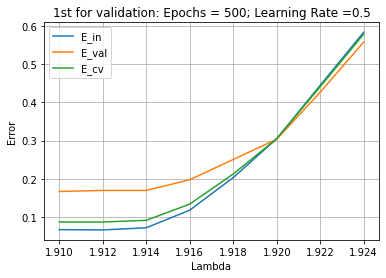

In [5]:
error_plot = plt.figure()
plot1 = error_plot.add_subplot(111)
plot1.plot(E_in[:,0], E_in[:,1],  label='E_in')
plot1.plot(E_out[:,0], E_out[:,1],  label='E_val')
plot1.plot(E_cv[:,0], E_cv[:,1],  label='E_cv')
plot1.set_xlabel('Lambda')
plot1.set_ylabel('Error')
plot1.set_title('1st for validation: Epochs = 500; Learning Rate =0.5')
plot1.legend()
plt.grid()
plt.show()
error_plot.savefig('Ein_Eval_Eout_1st.png', dpi=error_plot.dpi)

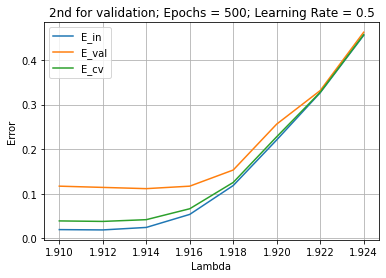

In [6]:
error_plot = plt.figure()
plot1 = error_plot.add_subplot(111)
plot1.plot(E_in[:,0], E_in[:,2],  label='E_in')
plot1.plot(E_out[:,0], E_out[:,2],  label='E_val')
plot1.plot(E_cv[:,0], E_cv[:,2],  label='E_cv')
plot1.set_xlabel('Lambda')
plot1.set_ylabel('Error')
plot1.set_title('2nd for validation; Epochs = 500; Learning Rate = 0.5')
plot1.legend()
plt.grid()
plt.show()
error_plot.savefig('Ein_Eval_Eout_2nd.png', dpi=error_plot.dpi)

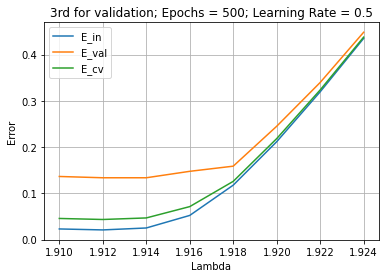

In [7]:
error_plot = plt.figure()
plot1 = error_plot.add_subplot(111)
plot1.plot(E_in[:,0], E_in[:,3],  label='E_in')
plot1.plot(E_out[:,0], E_out[:,3],  label='E_val')
plot1.plot(E_cv[:,0], E_cv[:,3],  label='E_cv')
plot1.set_xlabel('Lambda')
plot1.set_ylabel('Error')
plot1.set_title('3rd for validation; Epochs = 500; Learning Rate = 0.5')
plot1.legend()
plt.grid()
plt.show()
error_plot.savefig('Ein_Eval_Eout_3rd.png', dpi=error_plot.dpi)

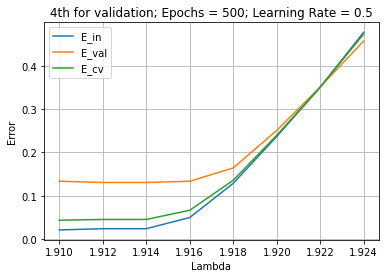

In [8]:
error_plot = plt.figure()
plot1 = error_plot.add_subplot(111)
plot1.plot(E_in[:,0], E_in[:,4],  label='E_in')
plot1.plot(E_out[:,0], E_out[:,4],  label='E_val')
plot1.plot(E_cv[:,0], E_cv[:,4],  label='E_cv')
plot1.set_xlabel('Lambda')
plot1.set_ylabel('Error')
plot1.set_title('4th for validation; Epochs = 500; Learning Rate = 0.5')
plot1.legend()
plt.grid()
plt.show()
error_plot.savefig('Ein_Eval_Eout_4th.png', dpi=error_plot.dpi)

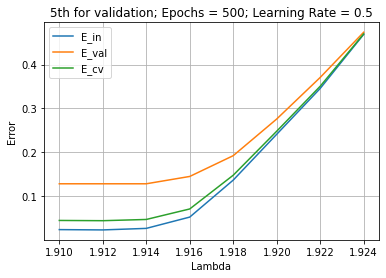

In [9]:
error_plot = plt.figure()
plot1 = error_plot.add_subplot(111)
plot1.plot(E_in[:,0], E_in[:,5],  label='E_in')
plot1.plot(E_out[:,0], E_out[:,5],  label='E_val')
plot1.plot(E_cv[:,0], E_cv[:,5],  label='E_cv')
plot1.set_xlabel('Lambda')
plot1.set_ylabel('Error')
plot1.set_title('5th for validation; Epochs = 500; Learning Rate = 0.5')
plot1.legend()
plt.grid()
plt.show()
error_plot.savefig('Ein_Eval_Eout_5th.png', dpi=error_plot.dpi)